# AG News Classification Dataset


<img src="news.jpeg" width="1000" height="500">

# News Classification Dataset

### Data Source:https://www.kaggle.com/amananandrai/ag-news-classification-dataset/notebooks

### News Classification dataset consist of News articles of class "world", "sports", "business", and "Science"

## **1. Objective**

Given a Title and description we have to determine wheater it belongs to which news article category .

### 1.1 Type of Machine learning problem:
We have to predict the news article on given informartion so it is multiclass Classification problem


### 1.2 How to determine wheater it belongs to which news article category ?
We can use Natural Language processing technique to convert the given texts to vectors as machine inderstands numbers so by using some of the Data preprossesingtechniques such as Word2Vec, BagofWords ,Tfidf etc etc , and then by using Classification machine learning Algorithm

### 2. load Datasets

In [2]:
import pandas as pd

In [7]:
train = pd.read_csv('train.csv')
train.shape

(120000, 3)

In [8]:
test = pd.read_csv('test.csv')
test.shape

(7600, 3)

### 2.1 Concating Both train and test dataset in single dataframe for text preprocessing purpose

In [9]:
frames = [train,test]
df = pd.concat(frames)

In [10]:
df.shape

(127600, 3)

In [12]:
df.head(3)

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...


In [11]:
print('total shape',df.shape)
print('total columns',df.columns)
print('*'*50)
print(df.info())

total shape (127600, 3)
total columns Index(['Class Index', 'Title', 'Description'], dtype='object')
**************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 127600 entries, 0 to 7599
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  127600 non-null  int64 
 1   Title        127600 non-null  object
 2   Description  127600 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.9+ MB
None


## 2.2 Attribute information:
1: Class Index: labels are given w.r.to news article of class i.e sports:1,science:2 etc etc

2: Title: Heading of news.

3: Description: News realted to above articles

### 3. Exploratory Data Analysis

In [15]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [16]:
df['Class Index'].value_counts()   # Balanced dataset

4    31900
3    31900
2    31900
1    31900
Name: Class Index, dtype: int64

### 3.1 Lets check which news article belongs to which with help of groupby

In [17]:
g = df.groupby(['Class Index'])
s = g.get_group(2)  
s.head(3)    # 2 : Sports 

,Class Index,Title,Description
448,2,"Phelps, Thorpe Advance in 200 Freestyle (AP)",AP - Michael Phelps took care of qualifying fo...
449,2,Reds Knock Padres Out of Wild-Card Lead (AP),AP - Wily Mo Pena homered twice and drove in f...
450,2,"Dreaming done, NBA stars awaken to harsh Olymp...",AFP - National Basketball Association players ...


In [18]:
b = g.get_group(3)   
b.head(3)     # 3: Buisness

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...


In [19]:
sc = g.get_group(4) 
sc.head(3)    # 4: Science

,Class Index,Title,Description
78,4,"'Madden,' 'ESPN' Football Score in Different W...",Reuters - Was absenteeism a little high\on Tue...
79,4,Group to Propose New High-Speed Wireless Forma...,Reuters - A group of technology companies\incl...
80,4,AOL to Sell Cheap PCs to Minorities and Senior...,Reuters - America Online on Thursday said it\p...


In [20]:
w = g.get_group(1) 
w.head(3)    # 1: World news

,Class Index,Title,Description
492,1,Venezuelans Vote Early in Referendum on Chavez...,Reuters - Venezuelans turned out early\and in ...
493,1,S.Koreans Clash with Police on Iraq Troop Disp...,Reuters - South Korean police used water canno...
494,1,Palestinians in Israeli Jails Start Hunger Str...,Reuters - Thousands of Palestinian\prisoners i...


### 3.2 lets assign labels to each and every class index and create another columns with help of Dictonary

In [21]:
labels = {1:'World',2:'Sports',3:'Buisness',4:'Science & Tech'}
df['labels'] = df['Class Index'].map(labels)

In [22]:
df.head()

,Class Index,Title,Description,labels
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Buisness
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Buisness
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Buisness
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Buisness
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",Buisness


### 3.3 Now Combine Title and Description to single columns ['Summary']



In [23]:
df['Summary'] = df['Title'] + ' ' + df['Description']
df.drop(columns=['Title', 'Description'],inplace=True)

In [24]:
df.head(3)

,Class Index,labels,Summary
0,3,Buisness,Wall St. Bears Claw Back Into the Black (Reute...
1,3,Buisness,Carlyle Looks Toward Commercial Aerospace (Reu...
2,3,Buisness,Oil and Economy Cloud Stocks' Outlook (Reuters...


In [25]:
df.labels.value_counts()

Science & Tech    31900
Buisness          31900
Sports            31900
World             31900
Name: labels, dtype: int64

### 3.4 Distribution of data points among News Labels

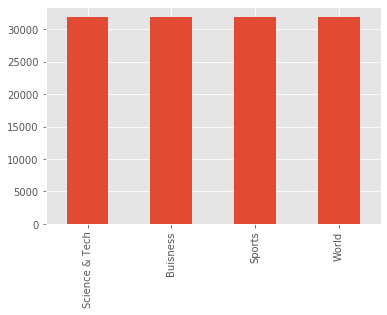

In [26]:
df.labels.value_counts().plot(kind = 'bar')     # Balanced Dataset

## What we have done so far ?
1:Concat train + test into single

2:Created new column = labels

3: added title and description into 1 columns = summary

### 3.5 Check for Null value if any:

In [27]:
df.isnull().sum()

Class Index    0
labels         0
Summary        0
dtype: int64

### 3.6 Exporting File to csv

In [28]:
df.to_csv('df.csv',index = 'False')